In [2]:
## Import necessary modules

import matplotlib
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import os

from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.signal import savgol_filter, periodogram
from scipy.stats import skew

from Wavefront import utils, wavefft

pylab.rcParams['figure.figsize'] = 16, 8

## Set directories for convenience
main_directory = '/nfs/slac/g/ki/ki19/lsst/snyder18'
data_directory = '/nfs/slac/g/ki/ki19/lsst/snyder18/Data'
results_directory = '/nfs/slac/g/ki/ki19/lsst/snyder18/Results'

/nfs/slac/g/ki/ki06/roodman/Software/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
## Get desired datasets using a list comprehension
all_subdirectories = os.listdir(results_directory)

subdirectories = [subdirectory for subdirectory in all_subdirectories if ("poldm" in subdirectory)
                  if ("GPI" in subdirectory)]

## Get the filepaths to the coefficients csv files
zernike_coefficient_datapaths = [os.path.join(results_directory, subdirectory, '{}_coefficients.csv'.format(subdirectory))
                                 for subdirectory in subdirectories]

datafile = []
Z_coefficients_all = []

print subdirectories

## Read each csv file and make a list of the resulting NumPy arrays
for datapath in zernike_coefficient_datapaths:
    
    try:
        datafile.append(datapath)
        coefficients = np.loadtxt(datapath, dtype=np.float64, delimiter=',')
        Z_coefficients_all.append(coefficients)
    except IOError:
        pass

Z_coefficients = [Z_coefficients_all[0], Z_coefficients_all[10], Z_coefficients_all[11]]

['ugp_When_2015.11.6_4.29.51_poldm_phase_GPI', 'ugp_When_2015.11.6_4.34.30_poldm_phase_GPI', 'ugp_When_2015.11.6_4.39.0_poldm_phase_GPI', 'ugp_When_2015.11.6_4.48.23_poldm_phase_GPI', 'ugp_When_2015.11.6_4.43.46_poldm_phase_GPI', 'ugp_When_2015.11.6_4.53.18_poldm_phase_GPI', 'ugp_When_2015.11.6_5.12.18_poldm_phase_GPI', 'ugp_When_2015.11.6_5.3.4_poldm_phase_GPI', 'ugp_When_2015.11.6_4.59.11_poldm_phase_GPI', 'ugp_When_2015.11.6_5.7.50_poldm_phase_GPI', 'aored_When_2016.1.24_21.16.13_poldm_phase_GPI', 'aored_When_2016.4.26_21.3.40_poldm_phase_GPI', 'aored_When_2016.4.26_20.46.36_poldm_phase_GPI', 'aored_When_2016.4.26_21.27.39_poldm_phase_GPI']


In [4]:
simfile = simfile = 'aratmos_rate1000.0_exptime60.0_3layers.fits'
sim_dict = utils.filepath_library(simfile, main_directory, 'GPI')
sim_periodograms = np.loadtxt(sim_dict['periodograms'], dtype=np.float64, delimiter=',')
sim_coefficients = np.loadtxt(sim_dict['zernikes'], dtype=np.float64, delimiter=',')

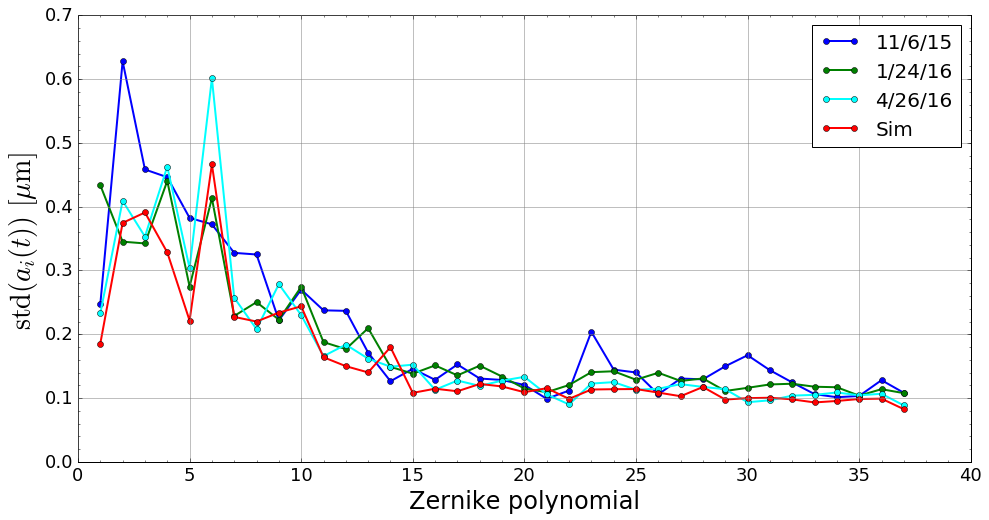

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1)

colors = ['blue', 'green', 'cyan']

for i in range(len(Z_coefficients)):
    
    zernikes = np.arange(1, 38)
    
    deviation = np.std(Z_coefficients[i], axis=1)
    
    ax.plot(zernikes, deviation, marker='o', linewidth=2.0, color=colors[i])
    
ax.plot(zernikes, np.std(0.5*sim_coefficients/(2*np.pi),axis=1), marker='o', linewidth=2.0, color='red')

#ax.set_title('Standard Deviation of Zernike coefficients', fontsize=24)
ax.set_xlabel(r'Zernike polynomial', fontsize=24)
ax.set_ylabel(r'$\mathrm{std}(a_i(t))$ $[\mu\mathrm{m}]$ ', fontsize=28)
ax.legend(['11/6/15', '1/24/16', '4/26/16', 'Sim'], loc=1, fontsize=20)
ax.minorticks_on()
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.grid(b=True, which='major', color='grey', linestyle='-')
#ax.grid(b=True, which='minor', color='grey', linestyle='-')
#plt.legend(subdirectories, loc=3)
    
plt.savefig('STD_Z_multiplot.png')

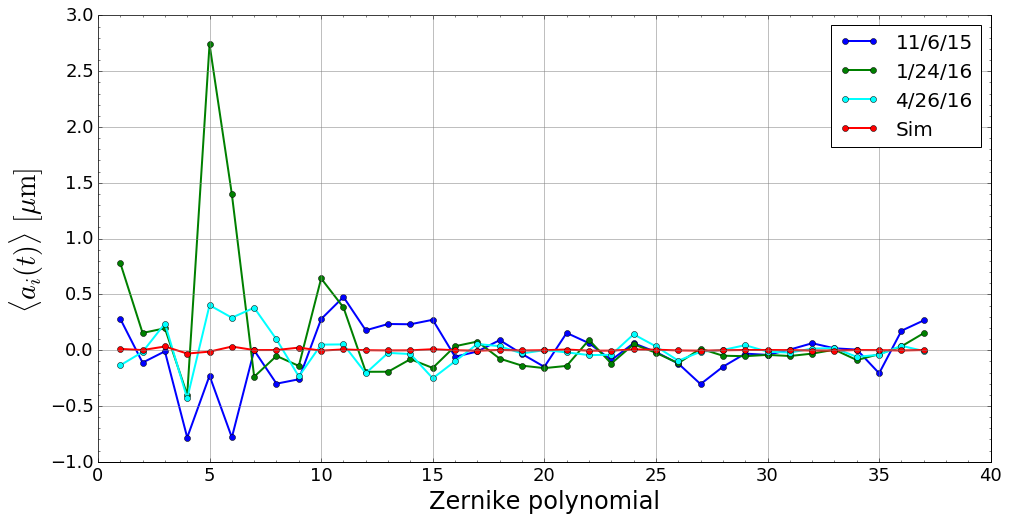

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1)

for i in range(len(Z_coefficients)):
    
    zernikes = np.arange(1, 38)
    
    mean = np.mean(Z_coefficients[i], axis=1)
    
    ax.plot(zernikes, mean, marker='o', linewidth=2.0, color=colors[i])
    
ax.plot(zernikes, np.mean(0.5*sim_coefficients/(2*np.pi),axis=1), marker='o', linewidth=2.0, color='red')

#ax.set_title('Mean of Zernike coefficients', fontsize=24)
ax.set_xlabel(r'Zernike polynomial', fontsize=24)
ax.set_ylabel(r'$\langle a_i(t) \rangle}$ $[\mu\mathrm{m}]$ ', fontsize=28)
ax.minorticks_on()
ax.legend(['11/6/15', '1/24/16', '4/26/16', 'Sim'], loc=1, fontsize=20)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.grid(b=True, which='major', color='grey', linestyle='-')
#ax.grid(b=True, which='minor', color='grey', linestyle='-')

plt.savefig('Mean_Z_multiplot.png')

In [7]:
## Get desired datasets using a list comprehension
## Get the filepaths to the coefficients csv files
zernike_periodograms_datapaths = [os.path.join(results_directory, subdirectory, '{}_periodograms.csv'.format(subdirectory))
                                 for subdirectory in subdirectories]

datafile2 = []
Z_periodograms_all = []
Z_frequencies_all = []

## Read each csv file and make a list of the resulting NumPy arrays
for datapath in zernike_periodograms_datapaths:
    
    try:
        datafile2.append(datapath)
        data = np.loadtxt(datapath, dtype=np.float64, delimiter=',')
        Z_frequencies_all.append(data[0,:])
        Z_periodograms_all.append(data[1:,:])
    except IOError:
        pass

Z_frequencies = [Z_frequencies_all[0], Z_frequencies_all[10], Z_frequencies_all[11]]
Z_periodograms = [Z_periodograms_all[0], Z_periodograms_all[10], Z_periodograms_all[11]]

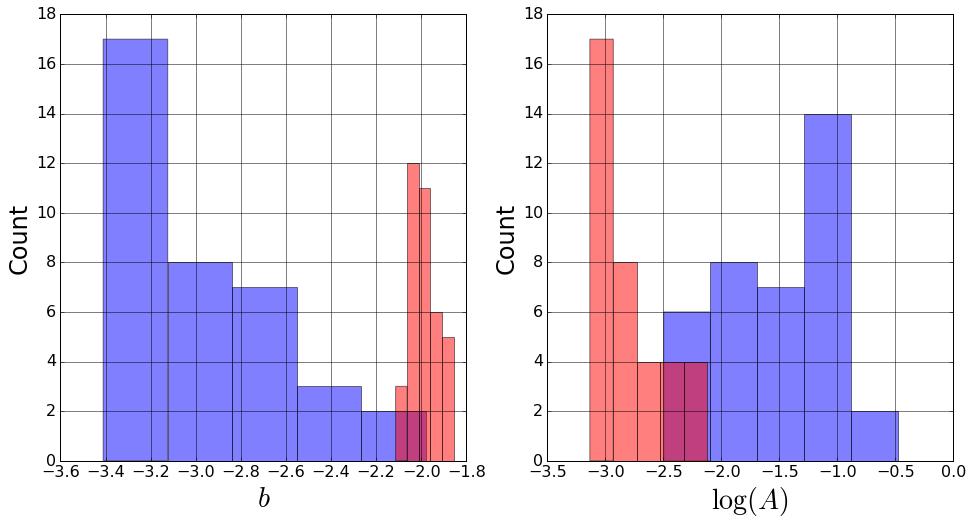

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2)

numbins = int(np.sqrt(36)-1)

for i in range(1):
    
    slopes = []
    intercepts = []

    for j in range(Z_periodograms[i].shape[0]):
        smoothed = 10**savgol_filter(np.log10(Z_periodograms[i][j,:]), 101, 5)
    
        ## Perform linear fit to smoothed PSD
        par = np.polyfit(np.log10(Z_frequencies[i][Z_frequencies[i]>1.]), np.log10(smoothed[Z_frequencies[i]>1.]), 1)
        slopes.append(par[0])
        intercepts.append(par[1])
        
    axes[0].hist(slopes, bins=numbins, alpha=0.5, color='blue')
    axes[1].hist(intercepts, bins=numbins, alpha=0.5, color='blue')
    
    #plt.plot(intercepts)
        
sim_slopes = []
sim_intercepts = []
        
for k in range(1, sim_periodograms.shape[0]):
    smoothed = 10**savgol_filter(np.log10(sim_periodograms[k,:]), 101, 5)
    
    ## Perform linear fit to smoothed PSD
    par = np.polyfit(np.log10(sim_periodograms[0,sim_periodograms[0,:]>1.]), 
                     np.log10(((0.5/(2*np.pi))**2)*smoothed[sim_periodograms[0,:]>1.]), 1)
    sim_slopes.append(par[0])
    sim_intercepts.append(par[1])

numbins = int(np.sqrt(len(slopes)-1)-1)
    
axes[0].hist(sim_slopes, bins=numbins, alpha=0.5, color='red')
axes[1].hist(sim_intercepts, bins=numbins, alpha=0.5, color='red')

#plt.plot(sim_intercepts)

axes[0].set_xlabel(r'$b$', fontsize=28)
axes[0].set_ylabel(r'Count', fontsize=24)
axes[1].set_ylabel(r'Count', fontsize=24)
axes[1].set_xlabel(r'$\log(A)$', fontsize=28)
axes[0].tick_params(axis='x', labelsize=16)
axes[0].tick_params(axis='y', labelsize=16)
axes[1].tick_params(axis='x', labelsize=16)
axes[1].tick_params(axis='y', labelsize=16)
#plt.minorticks_on()
axes[0].grid(b=True, which='major', color='black', linestyle='-')
axes[1].grid(b=True, which='major', color='black', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')

plt.savefig('power_law_results.png')

In [9]:
for i in range(3):
    
    slopes = []
    intercepts = []

    for j in range(Z_periodograms[i].shape[0]):
        smoothed = 10**savgol_filter(np.log10(Z_periodograms[i][j,:]), 101, 5)
    
        ## Perform linear fit to smoothed PSD
        par = np.polyfit(np.log10(Z_frequencies[i][Z_frequencies[i]>1.]), np.log10(smoothed[Z_frequencies[i]>1.]), 1)
        slopes.append(par[0])
        intercepts.append(par[1])
        
    axes[0].hist(slopes, bins=numbins, alpha=0.5)
    axes[1].hist(intercepts, bins=numbins, alpha=0.5)
    
    print i
    print np.mean(slopes), np.median(slopes), np.std(slopes), skew(slopes)


print np.mean(sim_slopes), np.median(sim_slopes), np.std(sim_slopes), skew(sim_slopes)

0
-2.96413229348 -3.0937564923 0.363512166752 0.867867183477
1
-2.99103123002 -3.01506997608 0.182801877706 0.476265150957
2
-3.16366316587 -3.16004760477 0.356858187715 0.813108029765
-1.98937105213 -1.9932176462 0.0598197251317 0.244549706354


In [10]:
simfile = simfile = 'aratmos_rate1000.0_exptime60.0.fits'
sim_dict = utils.filepath_library(simfile, main_directory, 'GPI')
sim_periodograms = np.loadtxt(sim_dict['periodograms'], dtype=np.float64, delimiter=',')
sim_coefficients = np.loadtxt(sim_dict['zernikes'], dtype=np.float64, delimiter=',')

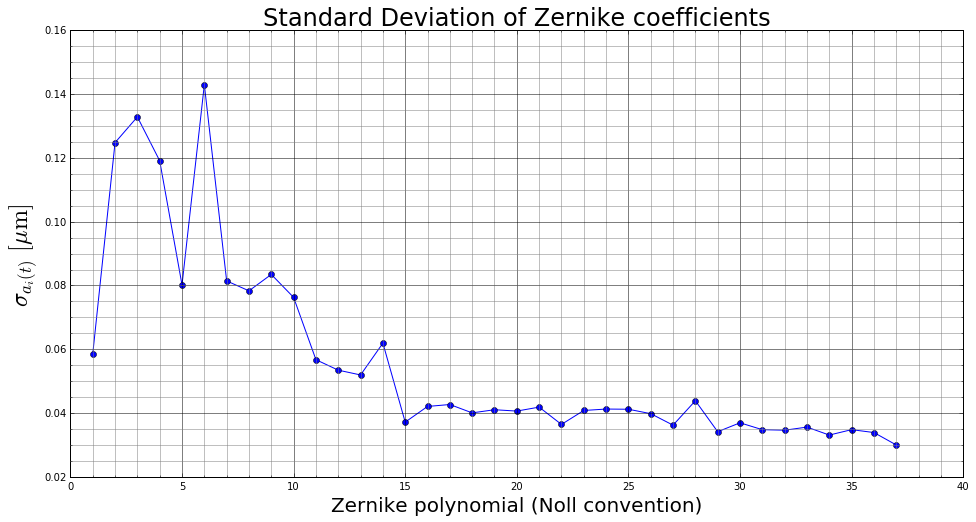

In [11]:
sim_zernikes = np.arange(1, 38)
sim_deviation = np.std(0.5*sim_coefficients/(2*np.pi), axis=1)
    
plt.plot(sim_zernikes, sim_deviation, marker='o')

plt.title('Standard Deviation of Zernike coefficients', fontsize=24)
plt.xlabel(r'Zernike polynomial (Noll convention)', fontsize=20)
plt.ylabel(r'$\sigma_{a_i(t)}$ $[\mu\mathrm{m}]$ ', fontsize=24)
plt.minorticks_on()
plt.grid(b=True, which='major', color='black', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
#plt.legend(subdirectories, loc=3)
    
#plt.savefig('RMS_Z{}_dt_multiplot.png'.format(Z_noll))

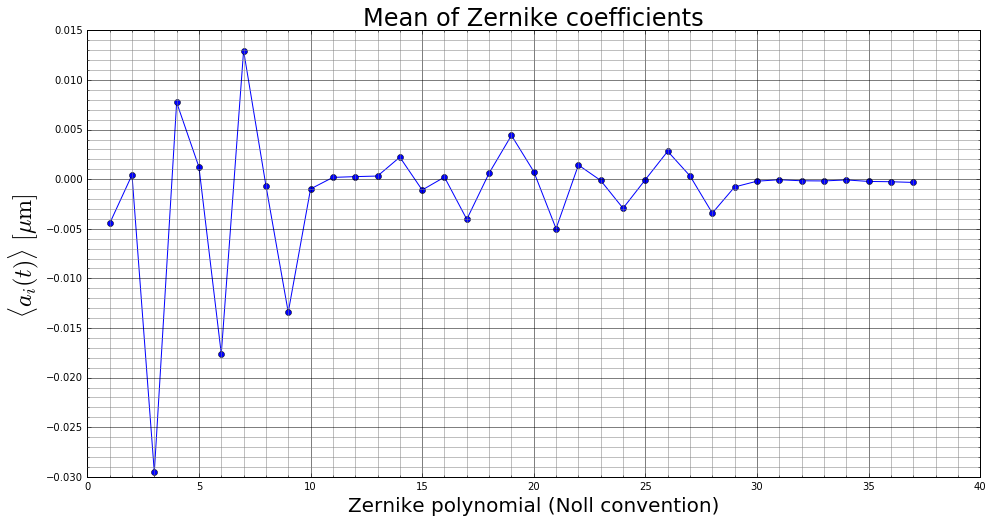

In [12]:
sim_zernikes = np.arange(1, 38)
sim_mean = np.mean(0.5*sim_coefficients/(2*np.pi), axis=1)
    
plt.plot(sim_zernikes, sim_mean, marker='o')

plt.title('Mean of Zernike coefficients', fontsize=24)
plt.xlabel(r'Zernike polynomial (Noll convention)', fontsize=20)
plt.ylabel(r'$\langle a_i(t) \rangle}$ $[\mu\mathrm{m}]$ ', fontsize=24)
plt.minorticks_on()
plt.grid(b=True, which='major', color='black', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')